<a href="https://colab.research.google.com/github/vadim13213/image_processing/blob/main/7.%20%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82%D0%BD%D0%B0%D1%8F%20%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0%20%E2%84%962.%20%D0%A1%D0%B6%D0%B0%D1%82%D0%B8%D0%B5%20%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B8%CC%86%2C%20%D0%B8%D1%81%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D1%83%D1%8F%20%D0%B0%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC%20%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8%20%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D0%BE%D0%BC%20%D0%9A-%D1%81%D1%80%D0%B5%D0%B4%D0%BD%D0%B8%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание 1.
1.	Сжать исходное изображение используя метод K-means, встроенный в библиотеку Scikit-learn при следующих вариантах количества цветов: 2, 3, 4, 8, 16, 32, 64, 128, 256. Сохранить получившиеся изображения в отдельную папку (Scikit Compressor) и продемонстрировать их в отчёте.

In [4]:
import os
import cv2
import numpy as np
from sklearn.cluster import KMeans
from imutils import resize
import os
import time
import pandas as pd

In [9]:
# Функция для сжатия изображения и сбора данных для таблицы
def compress_image_with_kmeans(image_path, n_colors, output_folder="Scikit_Compressor"):
    # Загружаю изображение
    image = cv2.imread(image_path)
    image_reshaped = image.reshape(-1, 3) / 255.0  # Преобразую в 2D массив и нормализую

    # Результаты для таблицы
    scikit_results = []

    for k in n_colors:
        # Замеряю время выполнения
        start_time = time.time()

        # Выполняю K-means кластеризацию
        kmeans = KMeans(n_clusters=k, random_state=0).fit(image_reshaped)
        compressed_colors = kmeans.cluster_centers_[kmeans.labels_]
        compressed_image = (compressed_colors * 255).astype(np.uint8).reshape(image.shape)

        # Сохраняю сжатое изображение
        output_path = f"{output_folder}/compressed_{k}_colors.jpg"
        cv2.imwrite(output_path, compressed_image)

        # Замеряю вес файла и время выполнения
        execution_time = time.time() - start_time
        file_size = os.path.getsize(output_path)



# Параметры для сжатия
image_path = '/content/volga.png'  # замените на путь к вашему изображению
output_folder = 'Scikit_Compressor'  # путь к папке для сохранения сжатых изображений
n_colors = [2, 3, 4, 8, 16, 32, 64, 128, 256]  # варианты количества цветов

# Вызываю функцию сжатия
compress_image_with_kmeans(image_path, n_colors, output_folder)


Задание 2.
2.	Используя алгоритм, дающий возможность вручную выбрать количество итераций, подобрать оптимальное количество итераций по скорости выполнения и качеству сжатого изображения. После этого также следует произвести сжатие изображения с указанными выше количествами цветов. Сохранить получившиеся изображения в отдельную папку (K-means Compressor) и продемонстрировать их в отчёте.

In [10]:
# Функция для сжатия изображения с заданным количеством итераций и сбором данных для таблицы
def compress_image_with_iterations(image_path, n_colors, max_iters, output_folder="K-means_Compressor"):
    # Загружаю изображение
    image = cv2.imread(image_path)
    image_reshaped = image.reshape(-1, 3) / 255.0  # Преобразую в 2D массив и нормализую

    # Результаты для таблицы
    kmeans_results = []

    for k in n_colors:
        # Замеряю время выполнения
        start_time = time.time()

        # Выполняю K-means кластеризацию с заданным количеством итераций
        kmeans = KMeans(n_clusters=k, max_iter=max_iters, random_state=0).fit(image_reshaped)
        compressed_colors = kmeans.cluster_centers_[kmeans.labels_]
        compressed_image = (compressed_colors * 255).astype(np.uint8).reshape(image.shape)

        # Сохраняю сжатое изображение
        output_path = f"{output_folder}/compressed_{k}_colors_{max_iters}_iters.jpg"
        cv2.imwrite(output_path, compressed_image)

        # Замеряю вес файла и время выполнения
        execution_time = time.time() - start_time
        file_size = os.path.getsize(output_path)




# Параметры для сжатия
image_path = '/content/volga.png'  # замените на путь к вашему изображению
output_folder = 'K-means_Compressor'  # путь к папке для сохранения сжатых изображений
n_colors = [2, 3, 4, 8, 16, 32, 64, 128, 256]  # варианты количества цветов
max_iters = 15  # оптимальное количество итераций, определённое опытным путём

# Вызываю функцию сжатия с заданным количеством итераций
compress_image_with_iterations(image_path, n_colors, max_iters, output_folder)


Задание 3.
3.	Составить сравнительную таблицу со следующими данными: количество цветов, вес сжатого изображения по алгоритму из п.1, время выполнения программы для сжатия изображения по алгоритму из п.1, вес сжатого изображения по алгоритму из п.2., время выполнения программы для сжатия изображения по алгоритму из п.2

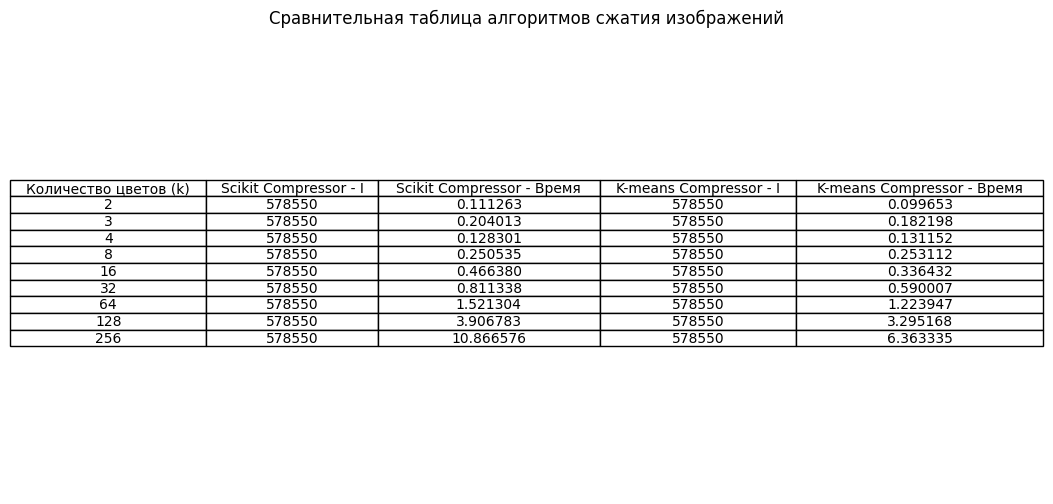